**Problem Statement**

Solving this problem will help you to gain a basic understanding of the HR industry and also how analytics and data science are
applied in practice in this domain.

**A brief understanding of the HR industry**

Human resources (HR) is the division of an organization that is responsible for finding, screening, recruiting, and training job
applicants, and administering employee-benefit programs.

This management is the strategic approach to the efficient management of people in any organization in a way that can help their
business gain a competitive advantage. It is designed to improve employee performance in service of an employer's strategic 
objectives.

**Understanding the Problem Statement**

In this project, you will have to put yourself in the shoes of an HR analytics expert and by leveraging the data provided, you 
are supposed to identify how salary is varying with respect to other considerable factors

**1) Here our target variable is "salary".**

**2) Lets analyze the data, clean the data, normalize the data, apply required ML models to identify which ML model is suitable 
   to the problem statement.**

In [2]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py

#importing the dataset

dataset=pd.read_csv(r'C:\Users\chefr\Desktop\New_data_Set.csv')

In [3]:
dataset

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG


**From the above table, we have 20 columns having both numerical and categorical data.**
 
 **categorical variables: Gender,Dependencies,calls,type,Billing,Rating,Education.**
 
**numerical variables: Age,Business,salary,base_pay, Bonus,Unit_Price,Volume,Opening balance,closing balance,low,unit_sales,total_sales,Months.**

**we will see which columns are affecting the 
salary.**

# **Data Analysis**

In [4]:
#seeing first few rows

dataset.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [5]:
#seeing last few rows

dataset.tail()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.840,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.295,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.840,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.535,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG
4999,Male,0,Yes,Yes,Two year,Yes,No,88,199970.74,79988.296,9998.537,627.839984,6003300,NaN,312.307316,311.081089,118.75,,72,PG


In [6]:
dataset.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


**The describe() function computes a summary of statistics pertaining to the DataFrame columns. This function gives the mean, 
std and IQR values. And, function excludes the character columns and given summary about numeric columns.**

In [7]:
#total number of rows and columns

dataset.shape

(5000, 20)

In [8]:
#checking duplicates in the dataset

dataset.duplicated().any()

False

In [9]:
#filling blank spaces with nan values before prerforming any operation

dataset=dataset.replace(r'^s*$',np.nan,regex=True)
dataset

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG


In [10]:
#checking null values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

**from the above information,we have totally 5000 entries are there and we have null values in the columns of Base_pay,openingbalance,Total_sales.** 


 **Total_Sales column showing that the datatype of object,but actually it is the datatype of 'float',So I will change it.**

In [11]:
#converting Total_Sales column datatype from object to float

dataset['Total_Sales']=pd.to_numeric(dataset['Total_Sales'],errors='coerce').astype('float')
dataset['Total_Sales'].dtypes

dtype('float64')

# **Let us see Target variable is normally distributed or not**

C:\Users\chefr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

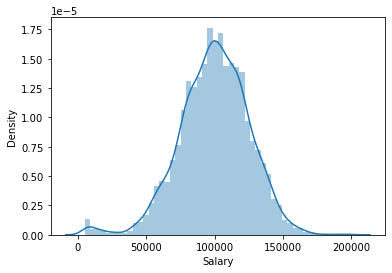

In [12]:
sns.distplot(dataset['Salary'])

**From the above graph, there are very few outliers.**
**Before dealing with the outliers, one should know what causes them. There are three causes for outliers — data entry/An experiment measurement errors, sampling problems, and natural variation. An error can occur while experimenting/entering data. During data entry, a typo can type the wrong value by mistake.An outlier can cause serious problems in statistical analyses.**

**Plots such as box plots and distribution plots come very handy in deciding which techniques to use.**

# **Handling Null Values**

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4984 non-null   f

**We find that there are null values in Base_pay,openingbalance,Total_Sales**

In [14]:
#count the null values for each column

dataset.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

**Total_Sales has 16 null values and Base_pay has 23 null values and openingbalance has 1476 null values.**

<AxesSubplot:>

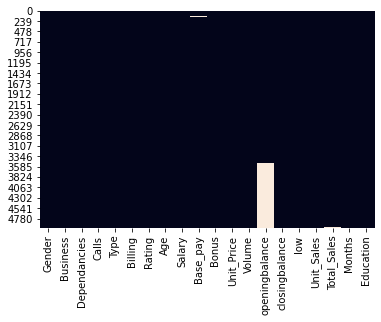

In [15]:
#lets see the null values by using heat map for better visulaization

sns.heatmap(dataset.isnull(),cbar=False)

 **openingbalance has highest null values when compared with Base_pay and Total_sales.**

# **Let us see outliers for each column to clean the data** 

**Plots such as box plots and distribution plots come very handy in deciding which techniques to use**

**There are three main missing value imputation techniques – mean, median and mode. Mean is the average of all values in a set, 
median is the middle number in a set of numbers sorted by size, and mode is the most common numerical value for two or more
sets.**

**the central tendency measure such as mean, median, or mode is considered for imputation. The goal is to find out which is a
better measure of the central tendency of data and use that value for replacing missing values appropriately.**

**1)For symmetric data distribution, one can use the mean value for imputing missing values. imputing missing data with mean 
values can only be done with numerical data.**

**2)When the data is skewed, it is good to consider using the median value for replacing the missing values.Note that imputing 
missing data with median value can only be done with numerical data.**

 **3)When the data is skewed, it is good to consider using mode values for replacing the missing values. imputing missing data with
mode values can be done with numerical and categorical data.**

C:\Users\chefr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='openingbalance'>

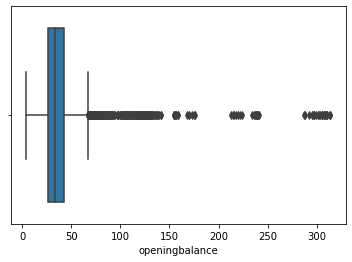

In [29]:
#let us see otuliers for opening balance column by using boxplot

sns.boxplot(dataset["openingbalance"])

**there are many outliers.**

In [30]:
#filling null values of openingbalance column with median values

dataset["openingbalance"].fillna(dataset["openingbalance"].median(),inplace=True)

C:\Users\chefr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Base_pay'>

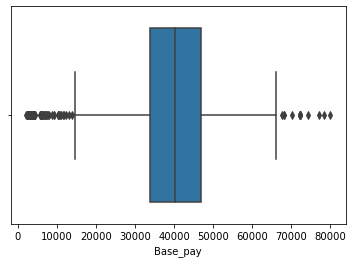

In [32]:
#lets check outliers for Base_pay column by using boxplot

sns.boxplot(dataset["Base_pay"])

**there are many outliers,so lets filling null values with median values**

In [33]:
#filling null values of Base_pay column with median values

dataset["Base_pay"].fillna(dataset["Base_pay"].median(),inplace=True)

C:\Users\chefr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Sales'>

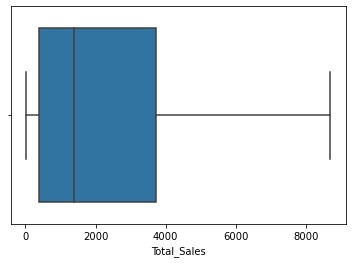

In [34]:
#let us see otuliers for Total_Sales column by using boxplot

sns.boxplot(dataset["Total_Sales"])

**Since Total_Sales column has some scaled data,we will fill null vlaues with mode**

In [35]:
#filling null values of Total_Sales column with mode

dataset["Total_Sales"].fillna(dataset["Total_Sales"].mode()[0],inplace=True)

**Now lets check is there anyone of 3 columns has null values or not after filling them with median,mode.**

In [36]:
#checking null values after filling them for verification

dataset.isnull().any()

Gender            False
Business          False
Dependancies      False
Calls             False
Type              False
Billing           False
Rating            False
Age               False
Salary            False
Base_pay          False
Bonus             False
Unit_Price        False
Volume            False
openingbalance    False
closingbalance    False
low               False
Unit_Sales        False
Total_Sales       False
Months            False
Education         False
dtype: bool

<AxesSubplot:>

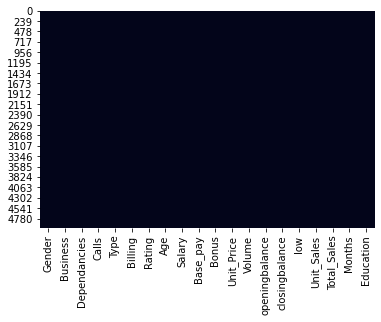

In [37]:
#checking null values after filling them in heatmap for better visualization

sns.heatmap(dataset.isnull(),cbar=False)

**From the above heatmap,we can say that there are no null values**

In [38]:
dataset

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.750000,3.760000,3.650000,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.850000,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.230000,4.290000,3.720000,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.260000,4.310000,3.830000,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.790000,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,33.119999,293.838840,310.955001,117.80,19.45,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,33.119999,301.311314,309.610028,118.60,19.45,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,33.119999,306.040009,303.483494,118.60,19.45,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,33.119999,308.579987,312.432438,118.65,19.45,72,PG


# Feature Selection

**Lets perform spearman correlation between our columns, since we do not know whether the data is normally distributed or not.**

In [39]:
ds1=dataset.drop(['Business'],axis=1)
ds1.corr(method="spearman")*100


,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
Age,100.000000,20.228180,19.253057,20.228180,12.826637,-3.934477,7.813692,44.098882,20.203950,20.226808,19.192259,22.283665
Salary,20.228180,100.000000,99.374354,100.000000,81.171311,-39.048779,17.198060,34.649833,99.985870,99.999741,98.831794,60.379576
Base_pay,19.253057,99.374354,100.000000,99.374354,80.816836,-39.000805,16.302190,33.959458,99.359657,99.374009,98.209566,59.719169
Bonus,20.228180,100.000000,99.374354,100.000000,81.171311,-39.048779,17.198060,34.649833,99.985870,99.999741,98.831794,60.379576
Unit_Price,12.826637,81.171311,80.816836,81.171311,100.000000,-32.422983,9.725756,26.369923,81.241207,81.173482,80.033149,55.006199
Volume,-3.934477,-39.048779,-39.000805,-39.048779,-32.422983,100.000000,-0.831111,-14.710785,-39.220924,-39.050546,-39.069994,-26.207721
openingbalance,7.813692,17.198060,16.302190,17.198060,9.725756,-0.831111,100.000000,25.314964,17.192930,17.197391,17.240158,-5.324627
closingbalance,44.098882,34.649833,33.959458,34.649833,26.369923,-14.710785,25.314964,100.000000,34.627752,34.648512,33.647340,36.592681
low,20.203950,99.985870,99.359657,99.985870,81.241207,-39.220924,17.192930,34.627752,100.000000,99.985599,98.817249,60.375227
Unit_Sales,20.226808,99.999741,99.374009,99.999741,81.173482,-39.050546,17.197391,34.648512,99.985599,100.000000,98.831491,60.377897


<AxesSubplot:>

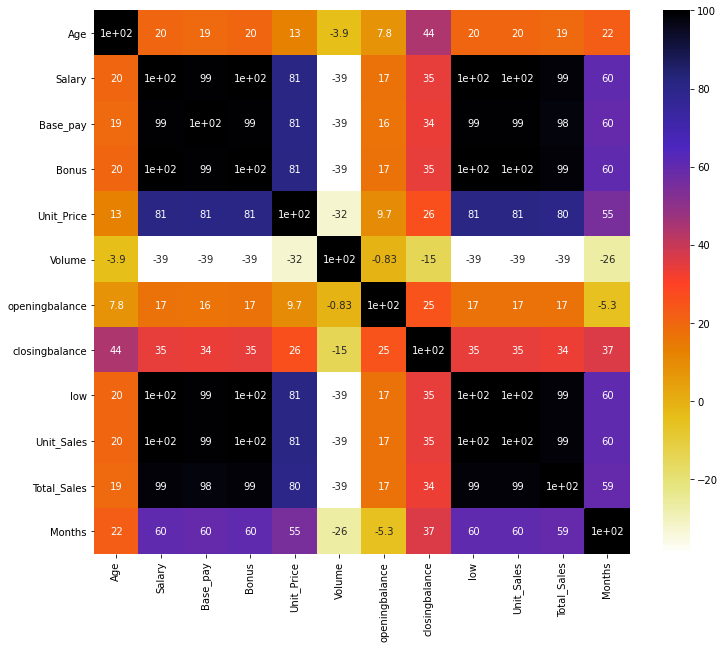

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(ds1.corr(method="spearman")*100,annot=True,cmap=plt.cm.CMRmap_r)

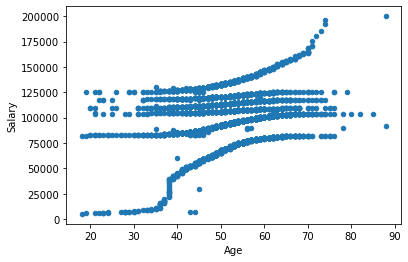

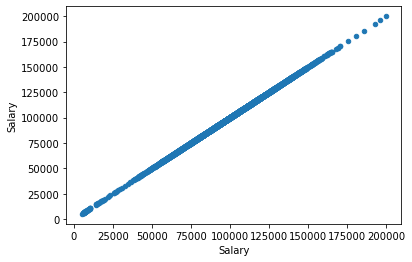

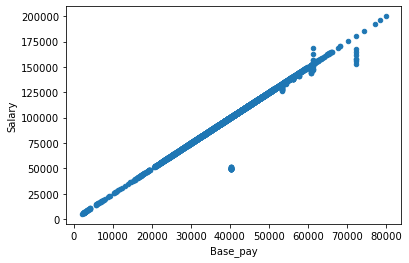

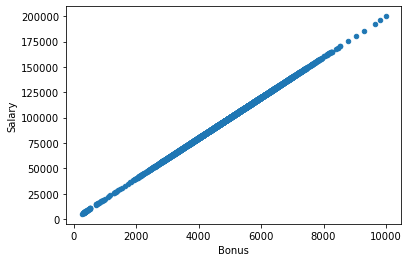

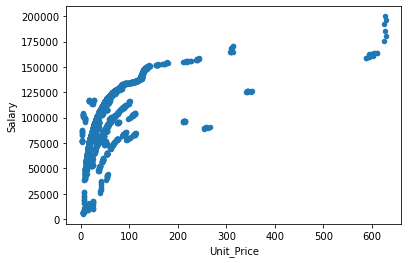

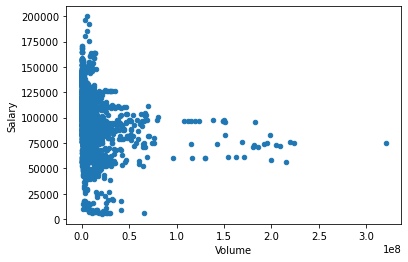

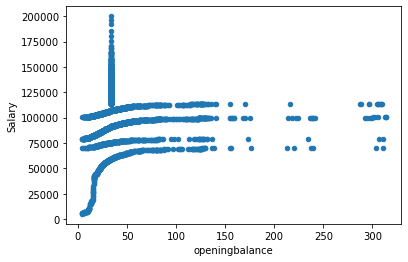

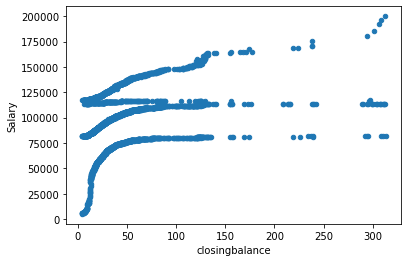

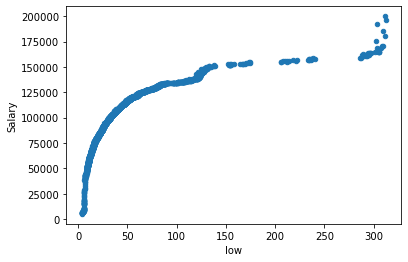

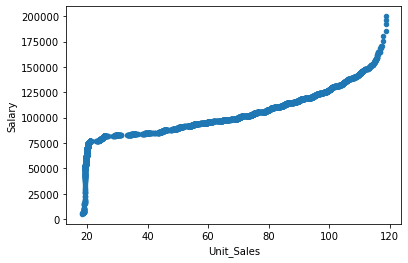

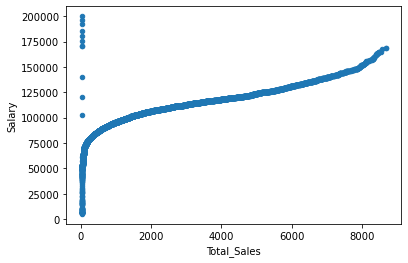

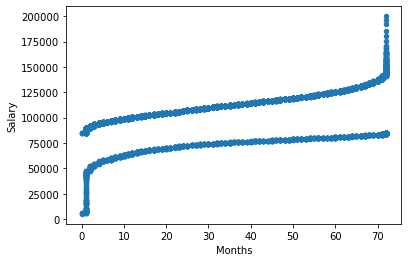

In [41]:
#plotting scatter plot between all numerical variables with respect to salary

for i in range(7,19):
    dataset.plot(kind='scatter',x=i,y='Salary')

# Let us see the relation between "Salary" and Categorical variables in our dataset

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

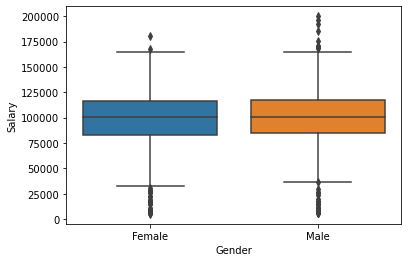

In [42]:
# relation between "Salary" and "Gender" columns

sns.boxplot(x=dataset["Gender"],y=dataset["Salary"])

**From the above result,median of both males and females are approximately equal so it says that salary does not differ in terms of males and females.so Gender column does not effect the salary column hence we can exclude this column.**

<AxesSubplot:xlabel='Business', ylabel='Salary'>

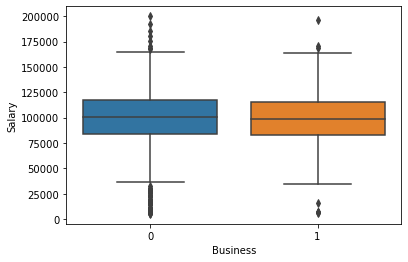

In [43]:
#relation between "salary" and "Business" columns

sns.boxplot(x=dataset["Business"],y=dataset["Salary"])

**There are outliers in the above boxplot.But,we can observe that the median of the person who has business and no business is
same for salary.Hence we can exclude this "Business" column since it doesnot effect the target variable.**

<AxesSubplot:xlabel='Dependancies', ylabel='Salary'>

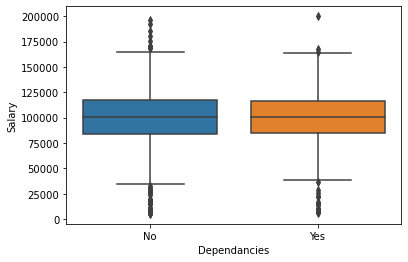

In [44]:
#relation between "Salary" and "Dependencies" columns

sns.boxplot(x=dataset["Dependancies"],y=dataset["Salary"])

**There are outliers in the above boxplot.But,we can observe that the median of the person who has dependant or not is same for salary.Hence we can exclude this "Dependencies" column since it doesnot effect the target variable.**

<AxesSubplot:xlabel='Calls', ylabel='Salary'>

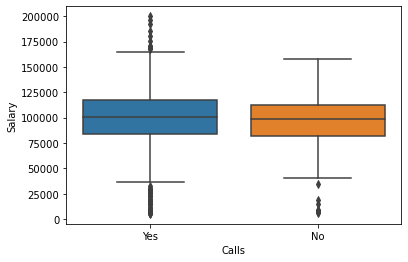

In [45]:
#relation between "Salary" and "Calls" columns

sns.boxplot(x=dataset["Calls"],y=dataset["Salary"])

**There are outliers in the above boxplot.But,we can observe that the median of the person who has authority to take a call is
same for salary.Hence we can exclude this "Calls" column since it doesnot effect the target variable.**

<AxesSubplot:xlabel='Type', ylabel='Salary'>

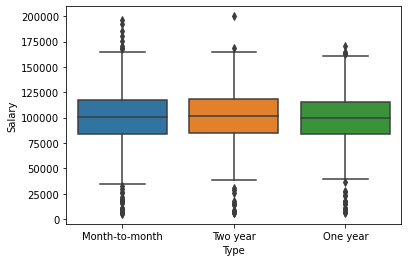

In [46]:
#relation between "Salary" and "Type" columns

sns.boxplot(x=dataset["Type"],y=dataset["Salary"])

**There are outliers in the above boxplot.But,we can observe that the median of the salary settlement type is
same for salary.Hence we can exclude this "Type" column since it doesnot effect the target variable.**

<AxesSubplot:xlabel='Billing', ylabel='Salary'>

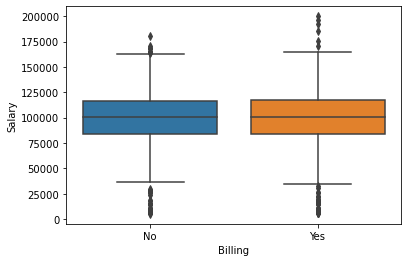

In [47]:
#relation between "Billing" and "Salary" column

sns.boxplot(x=dataset["Billing"],y=dataset["Salary"])

**There are outliers in the above boxplot.But,we can observe that the median of subscribed to billing plans or not is
same for salary.Hence we can exclude this "Billing" column since it doesnot effect the target variable.**

<AxesSubplot:xlabel='Rating', ylabel='Salary'>

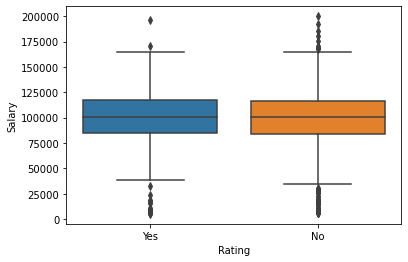

In [48]:
#relation between "Salary" and "Rating" column

sns.boxplot(x=dataset["Rating"],y=dataset["Salary"])

**There are outliers in the above boxplot.But,we can observe that the median of the person who has been given a rating by a 
superior or not is same for salary.Hence we can exclude this "Rating" column since it doesnot effect the target variable.**

<AxesSubplot:xlabel='Education', ylabel='Salary'>

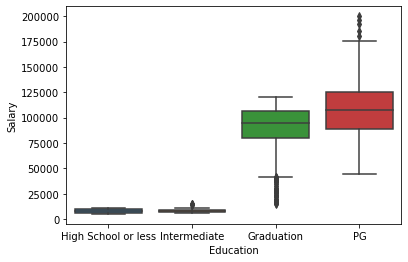

In [49]:
#relation between "Salary" and "Education" column

sns.boxplot(x=dataset["Education"],y=dataset["Salary"])

**From the above result, we can say that education column is hily effect salary so we cannot exclude it."High School" and
"Intermediate" education has low salary as compared to "Graduation" and "PG"."PG" has highest salary as compared to others.**

**Let us keep columns that are effecting our target variable only and drop other columns which are not effected the target 
variable.**

In [50]:
#Let us see the columns of the dataset

dataset.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
       'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales',
       'Months', 'Education'],
      dtype='object')

In [51]:
dataset.drop(["Gender","Business","Dependancies","Calls","Type","Billing","Rating","Age","Base_pay","Unit_Price","Volume","openingbalance","closingbalance","low","Unit_Sales","Total_Sales"],axis=1,inplace=True)

In [52]:
dataset.head()

,Salary,Bonus,Months,Education
0,5089.00,254.4500,0,High School or less
1,5698.12,284.9060,0,High School or less
2,5896.65,294.8325,0,High School or less
3,6125.12,306.2560,0,High School or less
4,6245.00,312.2500,1,High School or less


**This is our data after feature selection.Now we have to convert categorical columns into dummies,now as we can see education 
column is ordinal category since we can order it like first high school or less,and then Intermediate,and then graduation and 
finally PG.So lets use the label encoder for it.**

In [53]:
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
dataset["Education"]=class_le.fit_transform(dataset["Education"].values)

In [54]:
dataset

,Salary,Bonus,Months,Education
0,5089.00,254.4500,0,1
1,5698.12,284.9060,0,1
2,5896.65,294.8325,0,1
3,6125.12,306.2560,0,1
4,6245.00,312.2500,1,1
...,...,...,...,...
4995,180696.80,9034.8400,72,3
4996,185685.90,9284.2950,72,3
4997,192636.80,9631.8400,72,3
4998,195970.70,9798.5350,72,3


# Handling outliers in dataset

C:\Users\chefr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

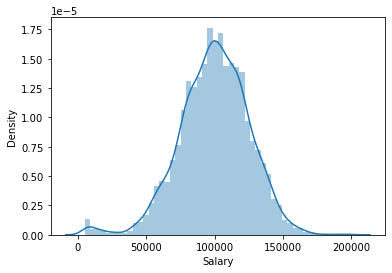

In [55]:
#For Salary column

sns.distplot(dataset.Salary)

**there are outliers in the above boxplot.So lets handle them.**

In [56]:
#Getting upper whisker and lower whisker for outliers detection

q1=np.quantile(dataset["Salary"],0.25)
q2=np.quantile(dataset["Salary"],0.50)
q3=np.quantile(dataset["Salary"],0.75)
IQR=q3-q1
print("q1=",q1)
print("q2=",q2)
print("q3=",q3)
print("IQR=",IQR)
Upper_whisker=q3+(1.5*IQR)
Lower_whisker=q1-(1.5*IQR)


q1= 83890.33898
q2= 100579.37849999999
q3= 116912.092475
IQR= 33021.753495


In [57]:
#Lets eliminate the outliers from salary column

dataset["Salary"]=dataset["Salary"][(dataset["Salary"]>=Lower_whisker)&(dataset["Salary"]<=Upper_whisker)]

C:\Users\chefr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

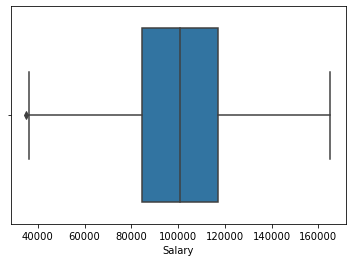

In [58]:
#Lets see Salary column after elemenating the outliers

sns.boxplot(dataset["Salary"])

In [59]:
#checking null values since we elemenated the outliers

dataset["Salary"].isnull().sum()

77

In [60]:
#lets fill the outliers with mean of salary column

dataset["Salary"]=dataset["Salary"].fillna(dataset["Salary"].mean())


In [61]:
#Now lets check null values after filling them

dataset["Salary"].isnull().sum()

0

C:\Users\chefr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

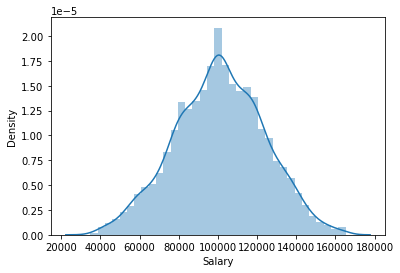

In [62]:
#Plotting boxplot after replacing outliers with mean

sns.distplot(dataset.Salary)

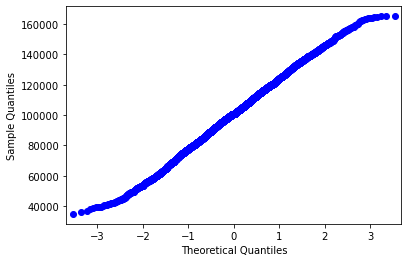

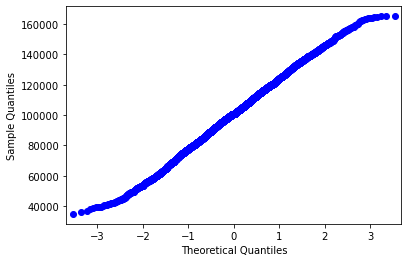

In [63]:
sm.qqplot(dataset.Salary)

**When the quantiles of two variables are plotted against each other, then the plot obtained is known as quantile – quantile
plot or qqplot.This plot provides a summary of whether the distributions of two variables are similar or not with respect to 
the locations.**

C:\Users\chefr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus'>

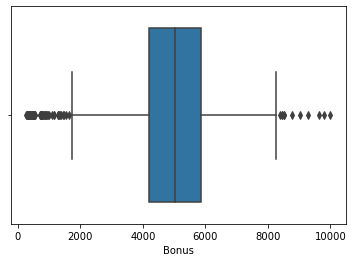

In [64]:
#For bonus column

sns.boxplot(dataset["Bonus"])

In [65]:
#Getting upper whisker and lower whisker for outliers detection

q1=np.quantile(dataset["Bonus"],0.25)
q2=np.quantile(dataset["Bonus"],0.50)
q3=np.quantile(dataset["Bonus"],0.75)
IQR=q3-q1
print("q1=",q1)
print("q2=",q2)
print("q3=",q3)
print("IQR=",IQR)
Upper_whisker=q3+(1.5*IQR)
Lower_whisker=q1-(1.5*IQR)

q1= 4194.5169495
q2= 5028.968925
q3= 5845.6046237499995
IQR= 1651.0876742499995


In [66]:
#elemenating outliers from Bonus column

dataset["Bonus"]=dataset["Bonus"][(dataset["Bonus"]>=Lower_whisker)&(dataset["Bonus"]<=Upper_whisker)]

C:\Users\chefr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus'>

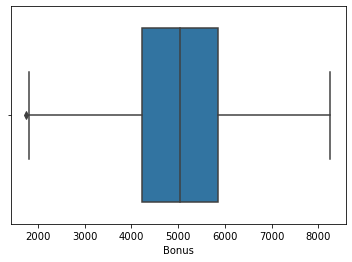

In [67]:
#Let us see Bonus column after elemenating the outliers

sns.boxplot(dataset["Bonus"])

In [68]:
#checking null values since we elemenate outliers so in place of it there was null values

dataset["Bonus"].isnull().sum()

77

In [69]:
#replacing null values with mean of bonus column since after removing outliers there should be mean=mode=median

dataset["Bonus"]=dataset["Bonus"].fillna(dataset["Bonus"].mean())

In [70]:
#checking null values since we filled them with mean

dataset["Bonus"].isnull().sum()

0

C:\Users\chefr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus'>

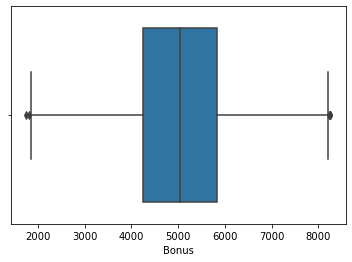

In [71]:
#plotting boxplot after replacing null values with Bonus column

sns.boxplot(dataset["Bonus"])

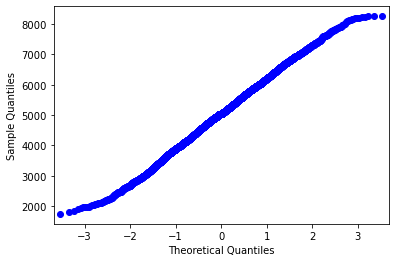

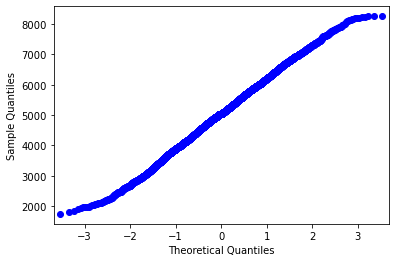

In [72]:
sm.qqplot(dataset["Bonus"])

**When the quantiles of two variables are plotted against each other, then the plot obtained is known as quantile – quantile 
plot or qqplot.This plot provides a summary of whether the distributions of two variables are similar or not with respect to 
the locations.**

C:\Users\chefr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Months'>

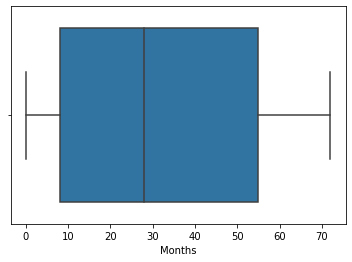

In [73]:
#For months column

sns.boxplot(dataset["Months"])


**From the above result,we are not having any outliers**

In [74]:
dataset

,Salary,Bonus,Months,Education
0,100799.611045,5039.980552,0,1
1,100799.611045,5039.980552,0,1
2,100799.611045,5039.980552,0,1
3,100799.611045,5039.980552,0,1
4,100799.611045,5039.980552,1,1
...,...,...,...,...
4995,100799.611045,5039.980552,72,3
4996,100799.611045,5039.980552,72,3
4997,100799.611045,5039.980552,72,3
4998,100799.611045,5039.980552,72,3


# Standard Scaler

In [75]:
#Our data is not in standard normal form,so we convert it into standard normal form with the use of standardization

from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
dataset[["Salary","Bonus","Months","Education"]]=scaling.fit_transform(dataset[["Salary","Bonus","Months","Education"]])

In [76]:
dataset.head()

,Salary,Bonus,Months,Education
0,-1.264628e-15,2.134060e-14,-1.306505,-0.547169
1,-1.264628e-15,2.134060e-14,-1.306505,-0.547169
2,-1.264628e-15,2.134060e-14,-1.306505,-0.547169
3,-1.264628e-15,2.134060e-14,-1.306505,-0.547169
4,-1.264628e-15,2.134060e-14,-1.265911,-0.547169


# Model Building

# Train-Test Split

In [77]:
#now we will equate the y column with the target variable i.e."Salary" and x column with the other columns
x=dataset.drop("Salary",axis=1)
y=dataset["Salary"]

In [78]:
#splitting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


**We used regressor type of model since our target variabls is "Salary" which is continuous.**

**Lets perform Linear Regression,Decision Tree,Random Forest and then we compare which one is best suited.**

# 1)Linear Regression

In [79]:
#importing LinearRegression from sklearn

from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [80]:
#Fitting training data to linear regression model

L.fit(x_train,y_train)

LinearRegression()

In [81]:
#using predict to vlaues of x_test

predictions=L.predict(x_test)
predictions

array([ 0.12923064,  1.69692685,  0.74353417, ...,  0.01209652,
       -0.66124124, -0.5913016 ])

In [82]:
#calculating accuracy for test data

print(L.score(x_test,y_test)*100)

100.0


In [83]:
#calculating rmse and r2 score values

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#model evaluation for training set

prediction1=L.predict(x_train)
rmse=np.sqrt(mean_squared_error(y_train,prediction1))
r2=r2_score(y_train,prediction1)*100
print("model performance for training set")
print("rmse is {}".format(rmse))
print("r2 score is {}".format(r2))

#model evaluation for testing set

prediction=L.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,prediction))
r2=r2_score(y_test,prediction)*100
print("model performance for training set")
print("rmse is {}".format(rmse))
print("r2 score is {}".format(r2))


model performance for training set
rmse is 1.618207067855021e-10
r2 score is 100.0
model performance for training set
rmse is 1.6504713246175415e-10
r2 score is 100.0


**Here our model got 100% accuracy.So lets visualize that how the model predict the values.**

Text(0, 0.5, 'Predicted values')

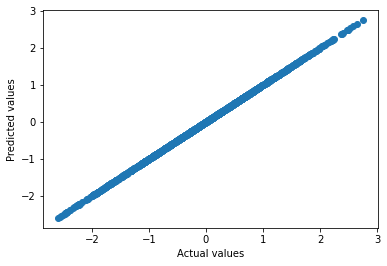

In [84]:
#plot prediction with scatter plot

plt.scatter(y_test,predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [85]:
#add predictions,actuals and independent variables in single dataframe for better comparison

ds2=x_test[["Bonus","Months","Education"]]
ds2["Actualvalue_Salary"]=y_test
ds2["Predictedvalue_Salary"]=predictions
ds2

,Bonus,Months,Education,Actualvalue_Salary,Predictedvalue_Salary
2764,0.129231,-0.575816,0.819046,0.129231,0.129231
4767,1.696927,1.575659,0.819046,1.696927,1.696927
3814,0.743534,0.601406,-1.230277,0.743534,0.743534
3499,0.557397,0.236061,0.819046,0.557397,0.557397
2735,0.113251,-0.575816,-1.230277,0.113251,0.113251
...,...,...,...,...,...
4140,0.958011,0.966751,0.819046,0.958011,0.958011
3969,0.834570,0.804376,-1.230277,0.834570,0.834570
2535,0.012097,-0.738191,0.819046,0.012097,0.012097
1361,-0.661241,-1.265911,0.819046,-0.661241,-0.661241


# Cross Validation

**Lets change the data and check accuracy**

In [86]:
from sklearn.model_selection import ShuffleSplit
model=LinearRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)*100
print(results)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


**Lets perform different models to check efficiency.**

# 2)Decision Tree

In [93]:
#Splitting the data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [88]:
#Importing the libraries for decision tree regressor

from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=3)
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [89]:
#calculating accuracy score for our decision tree model

print(dtree.score(x_train,y_train)*100)
print(dtree.score(x_test,y_test)*100)

96.93971454026061
96.96340784434648


In [90]:
#predict the values for testing data

predictions=dtree.predict(x_test)
predictions

array([ 0.2609568 ,  2.03718108,  0.73673265, ..., -0.17015349,
       -0.68635343, -0.68635343])

In [91]:
#getting features for plotting decision tree

features=list(dataset.columns[1:])
features

['Bonus', 'Months', 'Education']

In [92]:
dt=dtree.fit(x_train,y_train)

[Text(697.5, 713.475, 'Bonus <= 0.029\nmse = 1.004\nsamples = 3500\nvalue = 0.007'),
 Text(348.75, 509.625, 'Bonus <= -0.95\nmse = 0.388\nsamples = 1799\nvalue = -0.768'),
 Text(174.375, 305.775, 'Bonus <= -1.625\nmse = 0.191\nsamples = 601\nvalue = -1.498'),
 Text(87.1875, 101.92499999999995, 'mse = 0.089\nsamples = 202\nvalue = -2.016'),
 Text(261.5625, 101.92499999999995, 'mse = 0.037\nsamples = 399\nvalue = -1.235'),
 Text(523.125, 305.775, 'Bonus <= -0.428\nmse = 0.086\nsamples = 1198\nvalue = -0.402'),
 Text(435.9375, 101.92499999999995, 'mse = 0.023\nsamples = 539\nvalue = -0.686'),
 Text(610.3125, 101.92499999999995, 'mse = 0.017\nsamples = 659\nvalue = -0.17'),
 Text(1046.25, 509.625, 'Bonus <= 1.0\nmse = 0.347\nsamples = 1701\nvalue = 0.828'),
 Text(871.875, 305.775, 'Bonus <= 0.499\nmse = 0.075\nsamples = 1131\nvalue = 0.479'),
 Text(784.6875, 101.92499999999995, 'mse = 0.018\nsamples = 612\nvalue = 0.261'),
 Text(959.0625, 101.92499999999995, 'mse = 0.019\nsamples = 519\nva

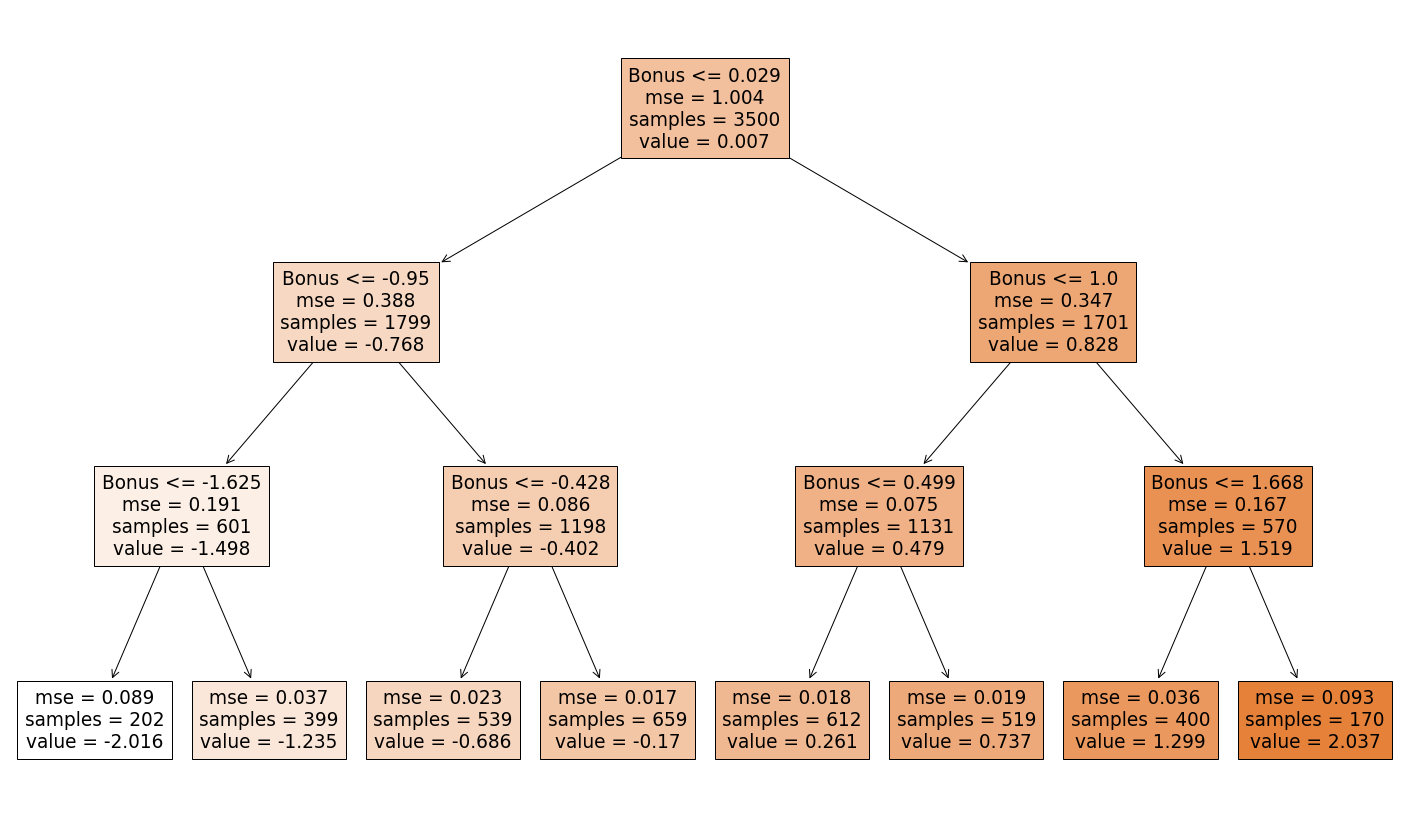

In [83]:
#plotting the decision tree

from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtree,feature_names=features,filled=True)

Text(0, 0.5, 'Predicted values')

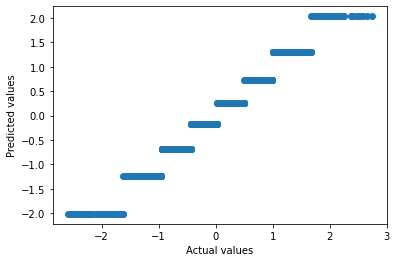

In [84]:
#plot prediction with scatter plot

plt.scatter(y_test,predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [85]:
#add predictions,actuals and independent variables in single dataframe for better comparison

ds3=x_test[["Bonus","Months","Education"]]
ds3["Actualvalue_Salary"]=y_test
ds3["Predictedvalue_Salary"]=predictions
ds3

,Bonus,Months,Education,Actualvalue_Salary,Predictedvalue_Salary
2764,0.129231,-0.575816,0.819046,0.129231,0.260957
4767,1.696927,1.575659,0.819046,1.696927,2.037181
3814,0.743534,0.601406,-1.230277,0.743534,0.736733
3499,0.557397,0.236061,0.819046,0.557397,0.736733
2735,0.113251,-0.575816,-1.230277,0.113251,0.260957
...,...,...,...,...,...
4140,0.958011,0.966751,0.819046,0.958011,0.736733
3969,0.834570,0.804376,-1.230277,0.834570,0.736733
2535,0.012097,-0.738191,0.819046,0.012097,-0.170153
1361,-0.661241,-1.265911,0.819046,-0.661241,-0.686353


**Lets check our model is efficient for other depth value**

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [87]:
dtree=DecisionTreeRegressor(max_depth=4)
dtree.fit(x_train,y_train)
print(dtree.score(x_train,y_train)*100)
print(dtree.score(x_test,y_test)*100)

99.20457607164602
99.25292467440602


In [88]:
predictions=dtree.predict(x_test)
predictions

array([ 0.14547469,  1.86821657,  0.8523161 , ..., -0.0639844 ,
       -0.54236193, -0.54236193])

[Text(697.5, 733.86, 'Bonus <= 0.029\nmse = 1.004\nsamples = 3500\nvalue = 0.007'),
 Text(348.75, 570.78, 'Bonus <= -0.95\nmse = 0.388\nsamples = 1799\nvalue = -0.768'),
 Text(174.375, 407.70000000000005, 'Bonus <= -1.625\nmse = 0.191\nsamples = 601\nvalue = -1.498'),
 Text(87.1875, 244.62, 'Bonus <= -2.155\nmse = 0.089\nsamples = 202\nvalue = -2.016'),
 Text(43.59375, 81.54000000000008, 'mse = 0.037\nsamples = 53\nvalue = -2.436'),
 Text(130.78125, 81.54000000000008, 'mse = 0.023\nsamples = 149\nvalue = -1.867'),
 Text(261.5625, 244.62, 'Bonus <= -1.266\nmse = 0.037\nsamples = 399\nvalue = -1.235'),
 Text(217.96875, 81.54000000000008, 'mse = 0.01\nsamples = 163\nvalue = -1.437'),
 Text(305.15625, 81.54000000000008, 'mse = 0.008\nsamples = 236\nvalue = -1.096'),
 Text(523.125, 407.70000000000005, 'Bonus <= -0.428\nmse = 0.086\nsamples = 1198\nvalue = -0.402'),
 Text(435.9375, 244.62, 'Bonus <= -0.673\nmse = 0.023\nsamples = 539\nvalue = -0.686'),
 Text(392.34375, 81.54000000000008, 'ms

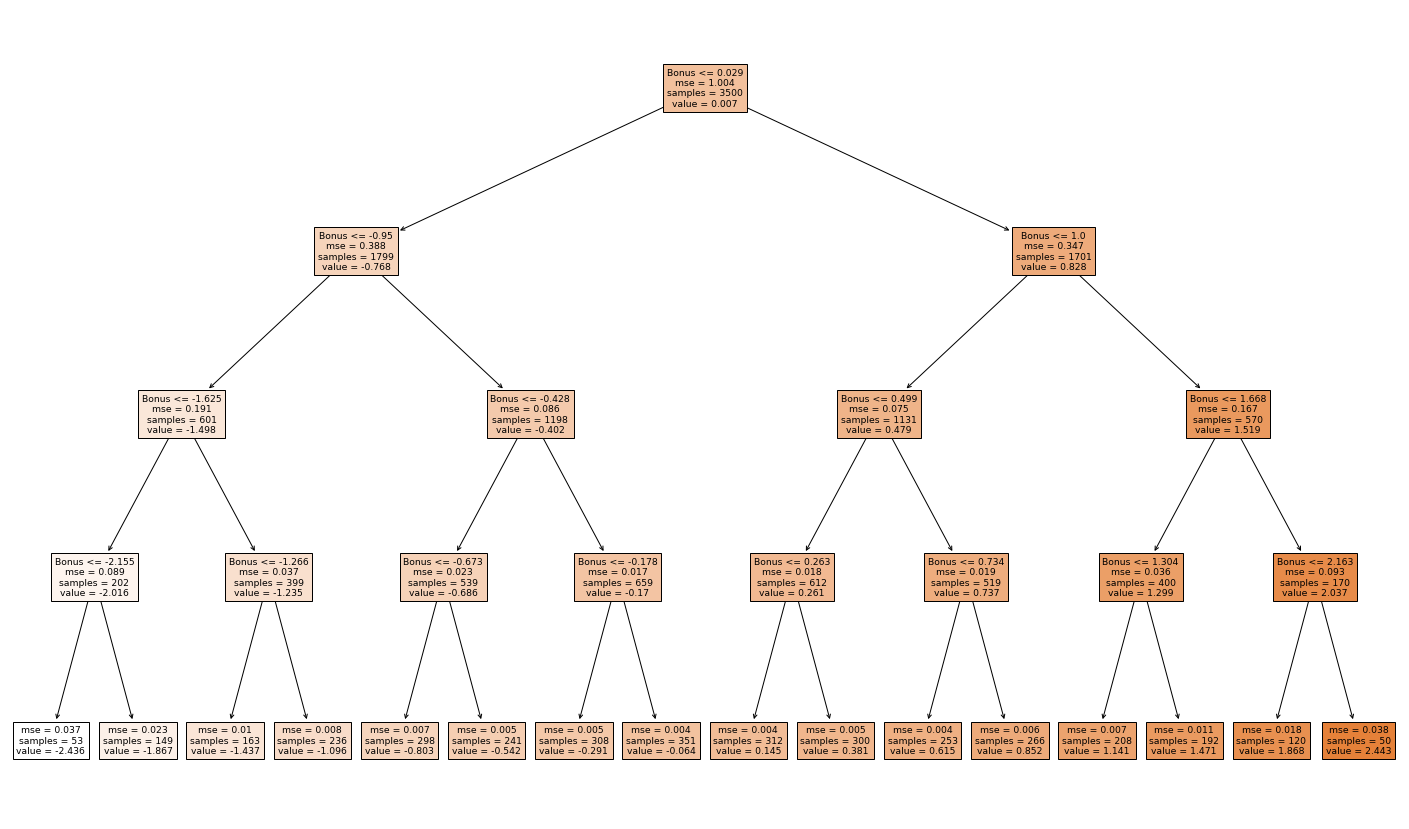

In [89]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtree,feature_names=features,filled=True)

Text(0, 0.5, 'Predicted values')

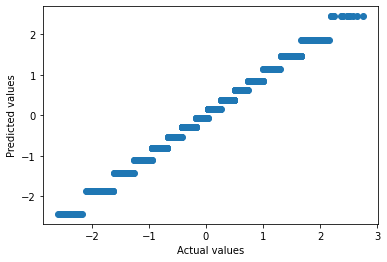

In [90]:
#plot prediction with scatter plot

plt.scatter(y_test,predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [91]:
#Lets check our model is well performed by changing the max_depth value for range(4,10)

for i in range(4,10):
    dtree=DecisionTreeRegressor(max_depth=i)
    dtree.fit(x_train,y_train)
    print("max_depth",i)
    print("Training score=",dtree.score(x_train,y_train)*100)
    print("Testing score=",dtree.score(x_test,y_test)*100)

max_depth 4
Training score= 99.20457607164602
Testing score= 99.25292467440602
max_depth 5
Training score= 99.8042227874103
Testing score= 99.78515505564607
max_depth 6
Training score= 99.95294924603274
Testing score= 99.94729157423431
max_depth 7
Training score= 99.98837365628896
Testing score= 99.9856032007209
max_depth 8
Training score= 99.99735241216663
Testing score= 99.9962322632649
max_depth 9
Training score= 99.99945130694005
Testing score= 99.99868857669752


**For depth>3,we got the accuracy of 99%.So,for depth>3 then our model was overfit.**

# Cross Validation

**Now,Lets check for different test values with depth=3 since it gives more accuracy.**

In [92]:
from sklearn.model_selection import ShuffleSplit
model2=DecisionTreeRegressor(max_depth=3)
ssplit=ShuffleSplit(n_splits=10,test_size=20)
results=cross_val_score(model2,x,y,cv=ssplit)*100
print(results)

[94.43942642 97.80355341 96.46283342 97.1777207  97.07599728 97.44719608
 97.53600907 97.18399755 98.25857224 98.2669444 ]


**We got high accuracy in decision tree regressor model.**

**Still I want to check for the accuracy in Random Forest model.**

# 3)Random Forest

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [94]:
#Importing the libraries for RandomForestRegressor for model building

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=3)
RF.fit(x_train,y_train)

RandomForestRegressor(n_estimators=3)

In [95]:
#predict the values for testing data

predictions=RF.predict(x_test)
predictions

array([ 0.12926668,  1.69699107,  0.74389261, ...,  0.01238999,
       -0.66136785, -0.59127041])

In [96]:
#calculating accuracy score for our decision tree model

print(RF.score(x_train,y_train)*100)
print(RF.score(x_test,y_test)*100)

99.99986968235791
99.99951354929463


**We got the accuracy score of 99.99%,so we can say this model is well performing.**

In [97]:
#Lets check our model is well performed by changing the n_estimator value for range(4,10)

for i in range(4,10):
    RF=RandomForestRegressor(n_estimators=i)
    RF.fit(x_train,y_train)
    print("n_estimator",i)
    print("Training score=",RF.score(x_train,y_train))
    print("Testing score=",RF.score(x_test,y_test))

n_estimator 4
Training score= 0.9999983103787207
Testing score= 0.9999957420653091
n_estimator 5
Training score= 0.99999695035684
Testing score= 0.9999960506623137
n_estimator 6
Training score= 0.9999977540635872
Testing score= 0.9999965567705844
n_estimator 7
Training score= 0.9999991235845482
Testing score= 0.9999964014635363
n_estimator 8
Training score= 0.9999992241979964
Testing score= 0.999997017791165
n_estimator 9
Training score= 0.9999991772273982
Testing score= 0.9999976948304226


Text(0, 0.5, 'Predicted values')

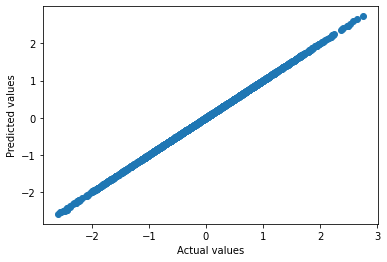

In [98]:
#plot prediction with scatter plot

plt.scatter(y_test,predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [99]:
#add predictions,actuals and independent variables in single dataframe for better comparison

ds4=x_test[["Bonus","Months","Education"]]
ds4["Actualvalue_Salary"]=y_test
ds4["Predictedvalue_Salary"]=predictions
ds4

,Bonus,Months,Education,Actualvalue_Salary,Predictedvalue_Salary
2764,0.129231,-0.575816,0.819046,0.129231,0.129267
4767,1.696927,1.575659,0.819046,1.696927,1.696991
3814,0.743534,0.601406,-1.230277,0.743534,0.743893
3499,0.557397,0.236061,0.819046,0.557397,0.557951
2735,0.113251,-0.575816,-1.230277,0.113251,0.114085
...,...,...,...,...,...
4140,0.958011,0.966751,0.819046,0.958011,0.957696
3969,0.834570,0.804376,-1.230277,0.834570,0.834103
2535,0.012097,-0.738191,0.819046,0.012097,0.012390
1361,-0.661241,-1.265911,0.819046,-0.661241,-0.661368


# Cross Validation

**Lets cross check this model to know whether this model is well performing or not.So,Lets change test size of model.**

In [100]:
model3=RandomForestRegressor(n_estimators=3)
ssplit=ShuffleSplit(n_splits=10,test_size=10)
results=cross_val_score(model3,x,y,cv=ssplit)
print(results)

[0.99999491 0.99999973 0.99999939 0.99999239 0.99999879 0.99999884
 0.99999927 0.99999979 0.99999426 0.99999111]


**CONCLUSION:**

**Random Forest Regressor model having high and almost same accuracy for all esimator values.** 

**Linear regression is also having high accuracy.So,we can use either Random Forest Regressor or Linear Regression.**

**Since we have only one target variable that cannot be classified into different classes,so we are not performing SVM.**